In [8]:
import numpy as np
import pandas as pd
import scipy
import operator
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from pandas import Series, DataFrame
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from pickle import dump
from pickle import load
%matplotlib inline

In [9]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)

In [10]:
os.chdir('D:/UT Data Analytics/Course 5 - Data Science with Python/Task 4 - Complete a Data Science Capstone Project')

In [11]:
# Import training data
trainDat = pd.read_csv('trainingData.csv')

In [12]:
# Import validation data
validationData = pd.read_csv('validationData.csv')

In [13]:
trainDat.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [14]:
validationData.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


In [15]:
trainDat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [16]:
trainDat.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [17]:
validationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 4.5 MB


In [18]:
validationData.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,1111.000000,1111.0,1111.000000,1111.000000,1111.0,1111.0,1111.0,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.0,1111.0,1111.0,1111.000000,1.111000e+03
mean,98.627363,100.0,99.665167,99.665167,100.0,100.0,100.0,94.297030,90.655266,98.811881,...,99.843384,-7529.197448,4.864902e+06,1.571557,0.758776,0.0,0.0,0.0,11.923492,1.380604e+09
std,16.127245,0.0,7.888265,7.888607,0.0,0.0,0.0,32.148809,39.886991,14.931667,...,5.220261,120.209336,7.027280e+01,1.001828,0.816139,0.0,0.0,0.0,6.556236,5.003222e+05
min,-94.000000,100.0,-87.000000,-88.000000,100.0,100.0,100.0,-99.000000,-96.000000,-98.000000,...,-74.000000,-7695.938755,4.864748e+06,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.379578e+09
25%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7637.423800,4.864843e+06,1.000000,0.000000,0.0,0.0,0.0,9.000000,1.380189e+09
50%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7560.376300,4.864915e+06,1.000000,1.000000,0.0,0.0,0.0,13.000000,1.380873e+09
75%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7420.539659,4.864967e+06,2.000000,1.000000,0.0,0.0,0.0,15.000000,1.380875e+09
max,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7299.786517,4.865017e+06,4.000000,2.000000,0.0,0.0,0.0,21.000000,1.381248e+09


In [19]:
# check for missing values in train set
pd.isnull(trainDat).values.any()

False

In [20]:
# check for missing values in validation set
pd.isnull(validationData).values.any()

False

## Exploratory Data Analysis

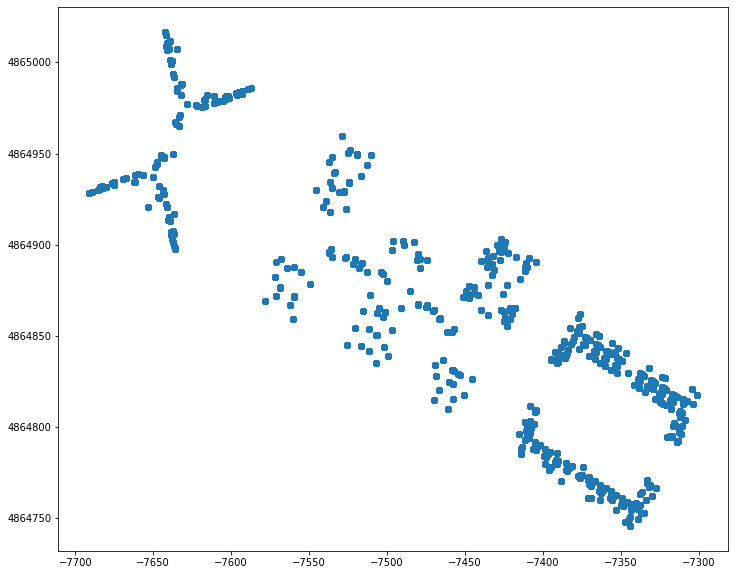

In [21]:
# Visualize Longitude vs Latitude
plt.scatter(trainDat['LONGITUDE'], trainDat['LATITUDE'])


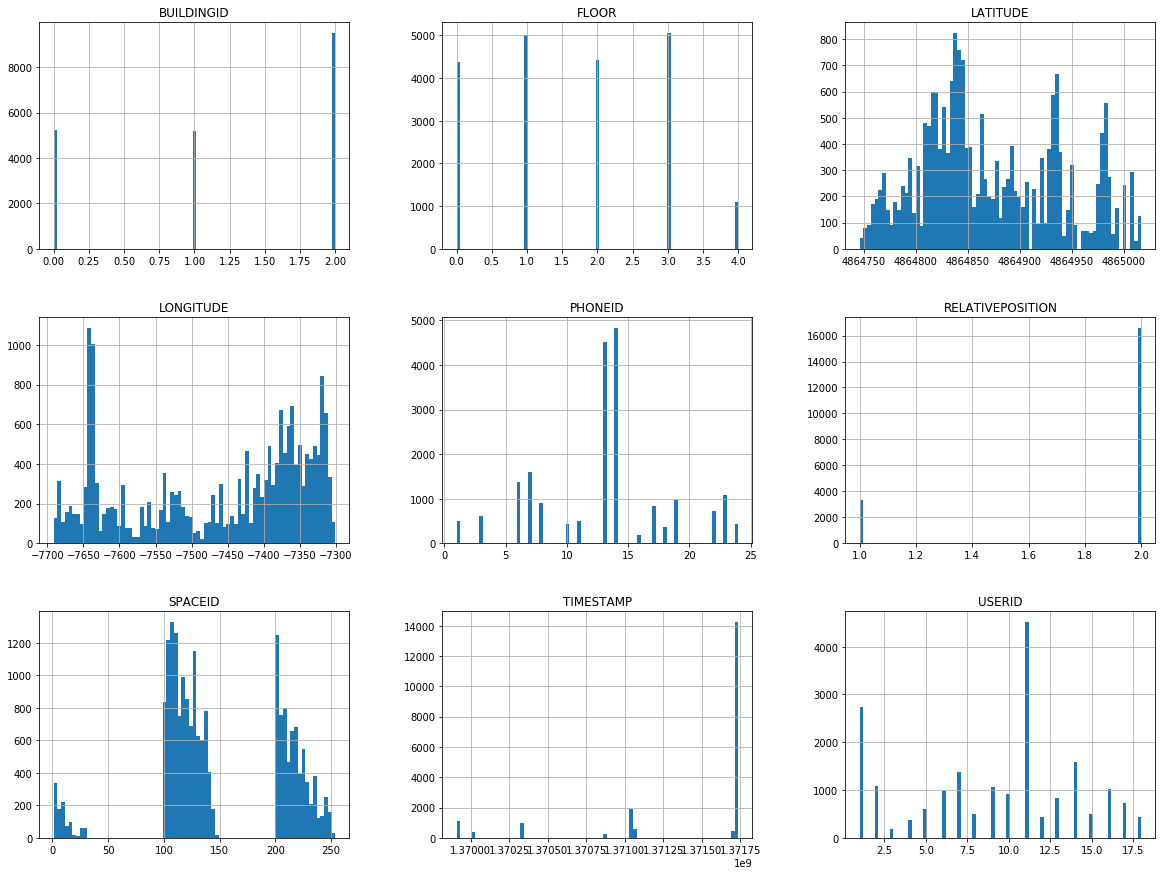

In [22]:
# Histograms of non-WAP dataset features
trainDat.iloc[:, 520:529].hist(bins=75, figsize=(20,15))
plt.show()


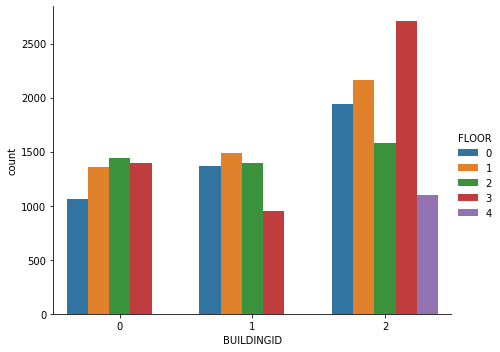

In [23]:
sns.catplot('BUILDINGID', data=trainDat, kind='count', hue='FLOOR',aspect=1.25, height=5)

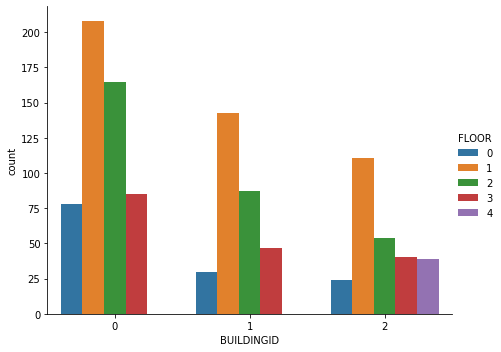

In [24]:
sns.catplot('BUILDINGID', data=validationData, kind='count', hue='FLOOR',aspect=1.25, height=5)

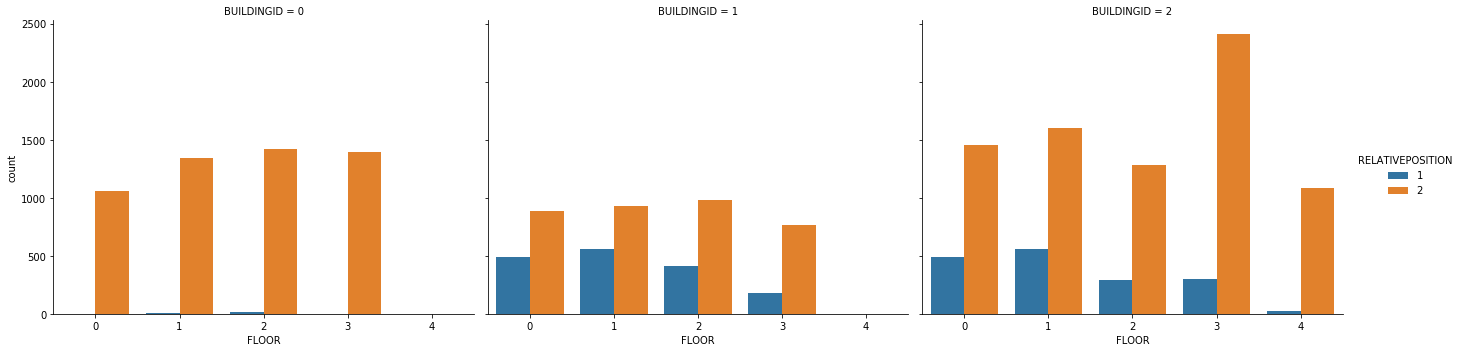

In [25]:
sns.catplot('FLOOR', data=trainDat, kind='count', hue='RELATIVEPOSITION',col='BUILDINGID',aspect=1.25, height=5)

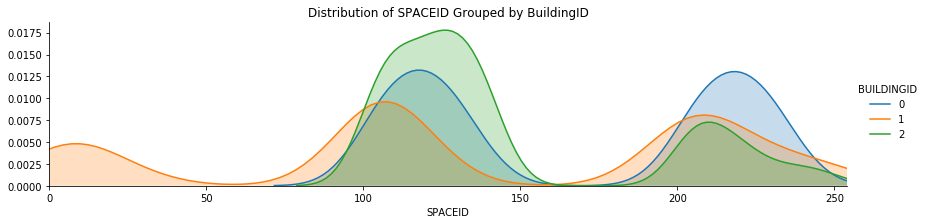

In [26]:
fig = sns.FacetGrid(trainDat, hue='BUILDINGID', aspect=4)
fig.map(sns.kdeplot, 'SPACEID', shade=True)
maxX = trainDat['SPACEID'].max()
fig.set(xlim=(0,maxX))
fig.set(title='Distribution of SPACEID Grouped by BuildingID')
fig.add_legend()

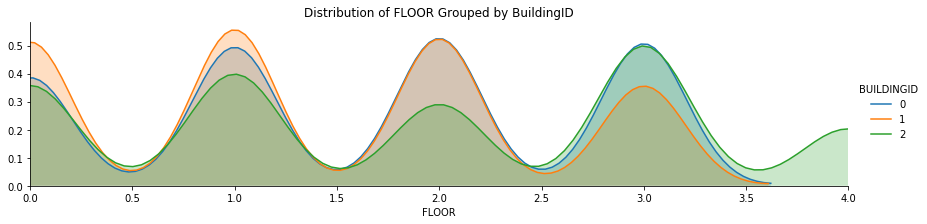

In [27]:
fig = sns.FacetGrid(trainDat, hue='BUILDINGID', aspect=4)
fig.map(sns.kdeplot, 'FLOOR', shade=True)
maxX = trainDat['FLOOR'].max()
fig.set(xlim=(0,maxX))
fig.set(title='Distribution of FLOOR Grouped by BuildingID')
fig.add_legend()

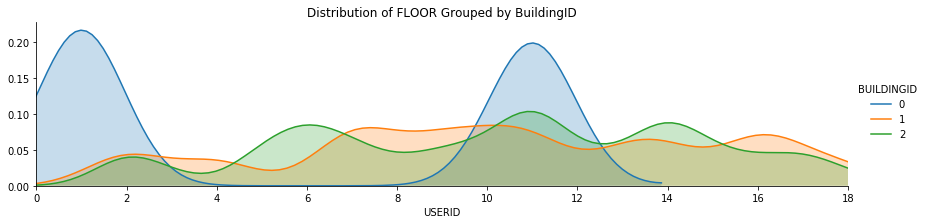

In [28]:
fig = sns.FacetGrid(trainDat, hue='BUILDINGID', aspect=4)
fig.map(sns.kdeplot, 'USERID', shade=True)
maxX = trainDat['USERID'].max()
fig.set(xlim=(0,maxX))
fig.set(title='Distribution of FLOOR Grouped by BuildingID')
fig.add_legend()

### Data Preprocessing

In [29]:
# Convert variables to categorical
trainDat['FLOOR'] = pd.Categorical(trainDat['FLOOR'])
trainDat['BUILDINGID'] = pd.Categorical(trainDat['BUILDINGID'])
trainDat['SPACEID'] = pd.Categorical(trainDat['SPACEID'])
trainDat['RELATIVEPOSITION'] = pd.Categorical(trainDat['RELATIVEPOSITION'])
trainDat['USERID'] = pd.Categorical(trainDat['USERID'])
trainDat['PHONEID'] = pd.Categorical(trainDat['PHONEID'])

trainDat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: category(6), float64(2), int64(521)
memory usage: 79.7 MB


In [30]:
# Seperate WAPS from remaining variables in training dataset
WAPStrainDat = trainDat.iloc[:,0:520]
WAPStrainDat.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [31]:
VARtrainDat = trainDat.iloc[:,520:529]
VARtrainDat.head()

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [32]:
# Seperate WAPS from remaining variables in validation dataset
WAPSvalDat = validationData.iloc[:,0:520]
WAPSvalDat.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [33]:
VARvalDat = validationData.iloc[:,520:529]
VARvalDat.head()

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


In [47]:
# Remove unregistered WAPS signals in training set
weakWAPStrainCol = [WAPStrainDat.mean(axis=0)>=99.8]
weakWAPStrainRow = [WAPStrainDat.mean(axis=1) >=99.8]
# Convert to DataFrame
weakWAPStrainCol_df = pd.DataFrame(weakWAPStrainCol)
weakWAPStrainRow_df = pd.DataFrame(weakWAPStrainRow).melt().drop(columns=['variable'])
# Inverse Boolean Values
weakWAPStrainCol_inv = ~weakWAPStrainCol_df
weakWAPStrainRow_inv = ~weakWAPStrainRow_df

In [71]:
# Create dataset with registered WAPS signals
goodWAPStrainRow = pd.concat([WAPStrainDat,weakWAPStrainRow_inv],axis=1,sort=True)
goodWAPStrainCol = pd.concat([goodWAPStrainRow,weakWAPStrainCol_inv],axis=0,sort=True)
goodWAPStrain = goodWAPStrainCol.loc[:,(goodWAPStrainCol == 1).any()]
goodWAPStrain = goodWAPStrain.loc[goodWAPStrain['value']==True]
goodWAPStrain = goodWAPStrain.drop(columns=['value'])
goodWAPStrain


,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,...,WAP504,WAP506,WAP508,WAP511,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,-97,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
19933,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
19934,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
19935,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [62]:
# Save good WAPS train data
goodWAPStrain.to_csv('goodWAPStrain.csv', index=False)

In [46]:
# Remove unregistered WAPS signals in validation dataset
weakWAPSvalCol = [WAPSvalDat.mean(axis=0)>=99.8]
weakWAPSvalRow = [WAPSvalDat.mean(axis=1) >=99.8]
# Convert to DataFrame
weakWAPSvalCol_df = pd.DataFrame(weakWAPSvalCol)
weakWAPSvalRow_df = pd.DataFrame(weakWAPSvalRow).melt().drop(columns=['variable'])
# Inverse Boolean Values
weakWAPSvalCol_inv = ~weakWAPSvalCol_df
weakWAPSvalRow_inv = ~weakWAPSvalRow_df

In [52]:
# Create dataset with registered WAPS signals
goodWAPSvalRow = pd.concat([WAPSvalDat,weakWAPSvalRow_inv],axis=1,sort=True)
goodWAPSvalCol = pd.concat([goodWAPSvalRow,weakWAPSvalCol_inv],axis=0,sort=True)
goodWAPSval = goodWAPSvalCol.loc[:,(goodWAPSvalCol == 1).any()]
goodWAPSval = goodWAPSval.loc[goodWAPSval['value']==True]
goodWAPSval = goodWAPSval.drop(columns=['value'])
goodWAPSval

,WAP001,WAP003,WAP004,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,...,WAP491,WAP492,WAP493,WAP495,WAP496,WAP497,WAP498,WAP499,WAP501,WAP502
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,-87,-87,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,-73,-72,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,-77,-75,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,-79,-79,...,100,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1107,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1108,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1109,100,100,100,100,100,100,100,100,100,-97,...,100,100,100,100,100,100,100,100,100,100


In [175]:
## Equalize row amount in Variable data sets and join with WAPS data

readyTrainDat = pd.concat([goodWAPStrain, VARtrainDat],axis=1).dropna()
readyValDat = pd.concat([goodWAPSval,VARvalDat],axis=1).dropna()
readyTrainDat

,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,...,WAP518,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100.0,100.0,100.0,-97.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
5,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,-7533.8962,4.864939e+06,2,1,105,2,2,23,1371713841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


In [98]:
readyValDat

,WAP001,WAP003,WAP004,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,...,WAP502,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,-87,-87,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,-73,-72,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,-77,-75,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,-79,-79,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,100,100,100,100,100,100,100,100,100,100,...,100,-7317.344231,4.864796e+06,3,2,0,0,0,13,1381156711
1107,100,100,100,100,100,100,100,100,100,100,...,100,-7313.731120,4.864792e+06,3,2,0,0,0,13,1381156730
1108,100,100,100,100,100,100,100,100,100,100,...,100,-7637.535798,4.864903e+06,0,0,0,0,0,13,1381247781
1109,100,100,100,100,100,100,100,100,100,-97,...,100,-7636.654005,4.864905e+06,0,0,0,0,0,13,1381247807


### Filter data to create building data sets

In [181]:
readyTrainDat_B0 = readyTrainDat[readyTrainDat['BUILDINGID'] == 0]
readyTrainDat_B1 = readyTrainDat[readyTrainDat['BUILDINGID'] == 1]
readyTrainDat_B2 = readyTrainDat[readyTrainDat['BUILDINGID'] == 2]

In [182]:

# Create unique ID for location representation
readyTrainDat_B0['LocID'] = readyTrainDat_B0['BUILDINGID'].astype(str) + '' + readyTrainDat_B0['FLOOR'].astype(str) + '' + readyTrainDat_B0['SPACEID'].astype(str) + '' + readyTrainDat_B0['RELATIVEPOSITION'].astype(str)
readyTrainDat_B1['LocID'] = readyTrainDat_B1['BUILDINGID'].astype(str) + '' + readyTrainDat_B1['FLOOR'].astype(str) + '' + readyTrainDat_B1['SPACEID'].astype(str) + '' + readyTrainDat_B1['RELATIVEPOSITION'].astype(str) 
readyTrainDat_B2['LocID'] = readyTrainDat_B2['BUILDINGID'].astype(str) + '' + readyTrainDat_B2['FLOOR'].astype(str) + '' + readyTrainDat_B2['SPACEID'].astype(str) + '' + readyTrainDat_B2['RELATIVEPOSITION'].astype(str) 

C:\Users\rms65\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rms65\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rms65\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [183]:
# Remove unused features
# Longitude, latitude, floor, buildingid, spaceid, relativeposition,, userid, phoneid, timestamp

readyTrainDat_B0 = readyTrainDat_B0.drop(columns=['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'], axis=1)
readyTrainDat_B1 = readyTrainDat_B1.drop(columns=['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'], axis=1)
readyTrainDat_B2 = readyTrainDat_B2.drop(columns=['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'], axis=1)

In [184]:
readyTrainDat_B0

,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,...,WAP506,WAP508,WAP511,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,LocID
7119,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,001022
7120,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,001102
7121,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,001112
7122,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,001072
7123,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,001062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18492,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-52.0,-52.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,032282
18493,100.0,100.0,100.0,100.0,-75.0,100.0,100.0,100.0,-51.0,-51.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,032362
18494,100.0,100.0,100.0,100.0,-88.0,100.0,100.0,100.0,-49.0,-49.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,032352
18496,100.0,100.0,100.0,100.0,-66.0,100.0,100.0,100.0,-76.0,-76.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,032302


In [185]:
# Make location ID categorical
readyTrainDat_B0['LocID'] = pd.Categorical(readyTrainDat_B0['LocID'])
readyTrainDat_B1['LocID'] = pd.Categorical(readyTrainDat_B1['LocID'])
readyTrainDat_B2['LocID'] = pd.Categorical(readyTrainDat_B2['LocID'])

In [186]:
# Save the processed file

readyTrainDat_B0.to_csv('readyTrainDat_B0.csv')
readyTrainDat_B1.to_csv('readyTrainDat_B1.csv')
readyTrainDat_B2.to_csv('readyTrainDat_B2.csv')

In [187]:
# Load building data sets

readyTrainDat_B0 = pd.read_csv('readyTrainDat_B0.csv', header = 0)
readyTrainDat_B1 = pd.read_csv('readyTrainDat_B1.csv', header = 0)
readyTrainDat_B2 = pd.read_csv('readyTrainDat_B2.csv', header = 0)

In [188]:
# Remove the 'Unnamed' column

del readyTrainDat_B0['Unnamed: 0']
del readyTrainDat_B1['Unnamed: 0']
del readyTrainDat_B2['Unnamed: 0']

In [189]:
readyTrainDat_B0

,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,...,WAP506,WAP508,WAP511,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,LocID
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1022
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1102
2,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1112
3,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1072
4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5243,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-52.0,-52.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,32282
5244,100.0,100.0,100.0,100.0,-75.0,100.0,100.0,100.0,-51.0,-51.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,32362
5245,100.0,100.0,100.0,100.0,-88.0,100.0,100.0,100.0,-49.0,-49.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,32352
5246,100.0,100.0,100.0,100.0,-66.0,100.0,100.0,100.0,-76.0,-76.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,32302


In [190]:
readyTrainDat_B1

,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,...,WAP506,WAP508,WAP511,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,LocID
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,121062
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,121062
2,100.0,100.0,100.0,-97.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,121032
3,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,121022
4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,121052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5154,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1342
5155,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1312
5156,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,13132
5157,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,131132


In [191]:
readyTrainDat_B2

,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,...,WAP506,WAP508,WAP511,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,LocID
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-93.0,100.0,232472
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-89.0,100.0,232482
2,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-91.0,232471
3,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-90.0,100.0,232462
4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-92.0,100.0,232452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9449,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-87.0,100.0,212062
9450,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,-84.0,-77.0,100.0,211412
9451,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,-90.0,-87.0,100.0,212072
9452,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-91.0,100.0,211401


## Create Alternate Datasets

#### NZV Dataset

In [201]:
# Ind/Dep variables for Building 0
X = readyTrainDat_B0.iloc[:, 0:364]
Y = readyTrainDat_B0.iloc[:, -1]

# Ind/Dep variables for Building 1
X_B1 = readyTrainDat_B1.iloc[:, 0:364]
Y_B1 = readyTrainDat_B1.iloc[:, -1]

# Ind/Dep variables for Building 2
X_B2 = readyTrainDat_B2.iloc[:, 0:364]
Y_B2 = readyTrainDat_B2.iloc[:, -1]

#### Building 0

In [224]:
# Create VarianceThreshold Object of 0.5 - Filter Features with 0.5 Variance
VT = VarianceThreshold(threshold=0.5)

In [225]:
# Apply threshold filter to dataset 'X'
VT.fit(X)

VarianceThreshold(threshold=0.5)

In [226]:
# Number of Features Above Threshold
VT_col = len(X.columns[VT.get_support()])

In [227]:
# Number of Columns Above Threshold
VT_col

152

In [228]:
VT_col_name = [column for column in X.columns
              if column in X.columns[VT.get_support()]]

# Print Names of Features
for column in VT_col_name:
    print(column)

WAP007
WAP008
WAP009
WAP013
WAP014
WAP017
WAP018
WAP019
WAP020
WAP023
WAP024
WAP025
WAP026
WAP027
WAP028
WAP029
WAP030
WAP031
WAP032
WAP033
WAP034
WAP035
WAP036
WAP039
WAP040
WAP041
WAP042
WAP043
WAP044
WAP045
WAP046
WAP047
WAP048
WAP049
WAP050
WAP051
WAP052
WAP053
WAP054
WAP057
WAP058
WAP071
WAP072
WAP075
WAP076
WAP080
WAP081
WAP103
WAP104
WAP123
WAP124
WAP142
WAP143
WAP150
WAP151
WAP154
WAP155
WAP156
WAP161
WAP162
WAP163
WAP166
WAP167
WAP168
WAP169
WAP170
WAP171
WAP172
WAP173
WAP182
WAP183
WAP184
WAP185
WAP191
WAP192
WAP224
WAP225
WAP248
WAP253
WAP264
WAP265
WAP267
WAP268
WAP269
WAP270
WAP271
WAP272
WAP273
WAP275
WAP276
WAP280
WAP281
WAP289
WAP290
WAP292
WAP294
WAP299
WAP300
WAP302
WAP305
WAP308
WAP319
WAP320
WAP322
WAP323
WAP324
WAP325
WAP326
WAP327
WAP328
WAP336
WAP337
WAP345
WAP346
WAP348
WAP350
WAP355
WAP356
WAP359
WAP362
WAP364
WAP376
WAP377
WAP379
WAP380
WAP381
WAP382
WAP383
WAP384
WAP385
WAP388
WAP392
WAP393
WAP399
WAP401
WAP402
WAP403
WAP404
WAP409
WAP410
WAP411
WAP413
WAP415

In [229]:
con_col = [column for column in X.columns
            if column not in X.columns[VT.get_support()]]

# Print Constant Features
print(len(con_col))

212


In [230]:
# Print Names of Features
for column in con_col:
    print(column)

WAP005
WAP006
WAP010
WAP011
WAP012
WAP015
WAP016
WAP021
WAP022
WAP037
WAP038
WAP055
WAP056
WAP059
WAP060
WAP061
WAP062
WAP063
WAP064
WAP065
WAP066
WAP067
WAP068
WAP069
WAP070
WAP073
WAP074
WAP077
WAP078
WAP082
WAP083
WAP084
WAP085
WAP086
WAP087
WAP088
WAP089
WAP090
WAP091
WAP096
WAP097
WAP098
WAP099
WAP101
WAP102
WAP105
WAP106
WAP107
WAP108
WAP109
WAP110
WAP111
WAP112
WAP113
WAP114
WAP115
WAP116
WAP117
WAP118
WAP119
WAP120
WAP121
WAP122
WAP125
WAP126
WAP127
WAP128
WAP129
WAP130
WAP131
WAP132
WAP134
WAP135
WAP136
WAP137
WAP138
WAP139
WAP140
WAP141
WAP144
WAP145
WAP146
WAP147
WAP148
WAP149
WAP164
WAP165
WAP174
WAP175
WAP176
WAP177
WAP178
WAP179
WAP180
WAP181
WAP186
WAP187
WAP188
WAP189
WAP196
WAP198
WAP203
WAP204
WAP214
WAP218
WAP222
WAP223
WAP229
WAP230
WAP232
WAP233
WAP234
WAP235
WAP236
WAP237
WAP249
WAP255
WAP256
WAP257
WAP258
WAP259
WAP260
WAP261
WAP262
WAP263
WAP274
WAP277
WAP278
WAP279
WAP282
WAP284
WAP286
WAP288
WAP295
WAP310
WAP311
WAP312
WAP313
WAP314
WAP315
WAP316
WAP317
WAP318

In [231]:
# Remove Constant Features
X_nzv_B0 = VT.transform(X)
print(X_nzv.shape)

(5248, 152)


In [232]:
# Build Non-Constant Features Dataset
X_nzvData_B0 = pd.DataFrame(data=X_nzv_B0, columns=VT_col_name)
X_nzvData_B0.head()

,WAP007,WAP008,WAP009,WAP013,WAP014,WAP017,WAP018,WAP019,WAP020,WAP023,...,WAP415,WAP434,WAP443,WAP447,WAP452,WAP459,WAP494,WAP500,WAP508,WAP515
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-80.0,-80.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,-86.0,100.0,100.0,100.0,100.0,100.0
3,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [233]:
# Combine Features and Target
rdyTrain_nzv_B0 = pd.concat([X_nzvData_B0, readyTrainDat_B0[['LocID']]], axis=1)
rdyTrain_nzv_B0.head()

,WAP007,WAP008,WAP009,WAP013,WAP014,WAP017,WAP018,WAP019,WAP020,WAP023,...,WAP434,WAP443,WAP447,WAP452,WAP459,WAP494,WAP500,WAP508,WAP515,LocID
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-80.0,-80.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1022
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1102
2,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,-86.0,100.0,100.0,100.0,100.0,100.0,1112
3,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1072
4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1062


#### Building 1

In [236]:
# Create VarianceThreshold Object of 0.5 - Filter Features with 0.5 Variance
VT = VarianceThreshold(threshold=0.5)

In [237]:
# Apply threshold filter to dataset 'X'
VT.fit(X_B1)

VarianceThreshold(threshold=0.5)

In [238]:
# Number of Features Above Threshold
VT_col = len(X_B1.columns[VT.get_support()])

In [239]:
# Number of Columns Above Threshold
VT_col

192

In [240]:
VT_col_name = [column for column in X_B1.columns
              if column in X_B1.columns[VT.get_support()]]

# Print Names of Features
for column in VT_col_name:
    print(column)

WAP006
WAP008
WAP010
WAP011
WAP012
WAP015
WAP016
WAP017
WAP021
WAP022
WAP023
WAP024
WAP027
WAP028
WAP029
WAP030
WAP035
WAP036
WAP037
WAP038
WAP043
WAP044
WAP045
WAP046
WAP049
WAP050
WAP051
WAP052
WAP055
WAP056
WAP059
WAP069
WAP077
WAP078
WAP082
WAP083
WAP084
WAP085
WAP086
WAP088
WAP089
WAP090
WAP091
WAP101
WAP102
WAP103
WAP104
WAP105
WAP106
WAP107
WAP108
WAP109
WAP110
WAP111
WAP112
WAP113
WAP114
WAP115
WAP116
WAP119
WAP120
WAP121
WAP122
WAP123
WAP124
WAP125
WAP126
WAP127
WAP129
WAP130
WAP131
WAP132
WAP134
WAP135
WAP136
WAP137
WAP140
WAP141
WAP142
WAP143
WAP144
WAP145
WAP146
WAP147
WAP148
WAP149
WAP150
WAP151
WAP155
WAP156
WAP164
WAP165
WAP166
WAP167
WAP168
WAP169
WAP170
WAP171
WAP172
WAP173
WAP174
WAP175
WAP176
WAP177
WAP178
WAP179
WAP180
WAP181
WAP182
WAP183
WAP184
WAP185
WAP186
WAP187
WAP188
WAP189
WAP191
WAP192
WAP198
WAP222
WAP223
WAP248
WAP255
WAP256
WAP257
WAP258
WAP259
WAP260
WAP261
WAP262
WAP263
WAP268
WAP274
WAP278
WAP282
WAP284
WAP286
WAP288
WAP289
WAP294
WAP295
WAP308
WAP310

In [241]:
con_col = [column for column in X_B1.columns
            if column not in X_B1.columns[VT.get_support()]]

# Print Constant Features
print(len(con_col))

172


In [242]:
# Print Names of Features
for column in con_col:
    print(column)

WAP005
WAP007
WAP009
WAP013
WAP014
WAP018
WAP019
WAP020
WAP025
WAP026
WAP031
WAP032
WAP033
WAP034
WAP039
WAP040
WAP041
WAP042
WAP047
WAP048
WAP053
WAP054
WAP057
WAP058
WAP060
WAP061
WAP062
WAP063
WAP064
WAP065
WAP066
WAP067
WAP068
WAP070
WAP071
WAP072
WAP073
WAP074
WAP075
WAP076
WAP080
WAP081
WAP087
WAP096
WAP097
WAP098
WAP099
WAP117
WAP118
WAP128
WAP138
WAP139
WAP154
WAP161
WAP162
WAP163
WAP196
WAP203
WAP204
WAP214
WAP218
WAP224
WAP225
WAP229
WAP230
WAP232
WAP233
WAP234
WAP235
WAP236
WAP237
WAP249
WAP253
WAP264
WAP265
WAP267
WAP269
WAP270
WAP271
WAP272
WAP273
WAP275
WAP276
WAP277
WAP279
WAP280
WAP281
WAP290
WAP292
WAP299
WAP300
WAP302
WAP305
WAP319
WAP320
WAP324
WAP325
WAP326
WAP327
WAP328
WAP332
WAP335
WAP336
WAP337
WAP346
WAP348
WAP355
WAP356
WAP359
WAP376
WAP377
WAP379
WAP381
WAP382
WAP383
WAP384
WAP385
WAP388
WAP389
WAP391
WAP392
WAP393
WAP399
WAP402
WAP403
WAP409
WAP410
WAP411
WAP422
WAP428
WAP434
WAP435
WAP436
WAP443
WAP447
WAP452
WAP453
WAP455
WAP456
WAP459
WAP460
WAP461
WAP465

In [243]:
# Remove Constant Features
X_nzv_B1 = VT.transform(X_B1)
print(X_nzv_B1.shape)

(5159, 192)


In [244]:
# Build Non-Constant Features Dataset
X_nzvData_B1 = pd.DataFrame(data=X_nzv_B1, columns=VT_col_name)
X_nzvData_B1.head()

,WAP006,WAP008,WAP010,WAP011,WAP012,WAP015,WAP016,WAP017,WAP021,WAP022,...,WAP405,WAP413,WAP415,WAP418,WAP432,WAP439,WAP449,WAP478,WAP489,WAP503
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,100.0,-97.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [245]:
# Combine Features and Target
rdyTrain_nzv_B1 = pd.concat([X_nzvData_B1, readyTrainDat_B1[['LocID']]], axis=1)
rdyTrain_nzv_B1.head()

,WAP006,WAP008,WAP010,WAP011,WAP012,WAP015,WAP016,WAP017,WAP021,WAP022,...,WAP413,WAP415,WAP418,WAP432,WAP439,WAP449,WAP478,WAP489,WAP503,LocID
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,121062
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,121062
2,100.0,-97.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,121032
3,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,121022
4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,121052


#### Building 2

In [246]:
# Create VarianceThreshold Object of 0.5 - Filter Features with 0.5 Variance
VT = VarianceThreshold(threshold=0.5)

In [247]:
# Apply threshold filter to dataset 'X'
VT.fit(X_B2)

VarianceThreshold(threshold=0.5)

In [248]:
# Number of Features Above Threshold
VT_col = len(X_B2.columns[VT.get_support()])

In [249]:
# Number of Columns Above Threshold
VT_col

162

In [250]:
VT_col_name = [column for column in X_B2.columns
              if column in X_B2.columns[VT.get_support()]]

# Print Names of Features
for column in VT_col_name:
    print(column)

WAP005
WAP006
WAP011
WAP012
WAP018
WAP059
WAP060
WAP061
WAP062
WAP063
WAP064
WAP065
WAP066
WAP067
WAP068
WAP069
WAP070
WAP073
WAP074
WAP077
WAP078
WAP082
WAP083
WAP084
WAP085
WAP087
WAP096
WAP097
WAP098
WAP099
WAP107
WAP108
WAP109
WAP110
WAP111
WAP112
WAP113
WAP114
WAP115
WAP116
WAP117
WAP118
WAP121
WAP122
WAP127
WAP128
WAP131
WAP132
WAP138
WAP139
WAP140
WAP141
WAP144
WAP145
WAP146
WAP147
WAP164
WAP165
WAP174
WAP175
WAP176
WAP177
WAP178
WAP179
WAP180
WAP181
WAP186
WAP187
WAP188
WAP189
WAP196
WAP198
WAP203
WAP204
WAP214
WAP218
WAP229
WAP230
WAP232
WAP233
WAP234
WAP235
WAP236
WAP237
WAP248
WAP249
WAP258
WAP260
WAP261
WAP274
WAP277
WAP279
WAP282
WAP284
WAP286
WAP305
WAP313
WAP315
WAP316
WAP318
WAP329
WAP332
WAP335
WAP338
WAP340
WAP342
WAP351
WAP362
WAP369
WAP371
WAP372
WAP375
WAP386
WAP389
WAP391
WAP394
WAP396
WAP398
WAP413
WAP418
WAP422
WAP428
WAP432
WAP435
WAP436
WAP439
WAP449
WAP453
WAP455
WAP456
WAP460
WAP461
WAP465
WAP467
WAP473
WAP476
WAP478
WAP479
WAP480
WAP481
WAP483
WAP484
WAP486

In [251]:
con_col = [column for column in X_B2.columns
            if column not in X_B2.columns[VT.get_support()]]

# Print Constant Features
print(len(con_col))

202


In [252]:
# Print Names of Features
for column in con_col:
    print(column)

WAP007
WAP008
WAP009
WAP010
WAP013
WAP014
WAP015
WAP016
WAP017
WAP019
WAP020
WAP021
WAP022
WAP023
WAP024
WAP025
WAP026
WAP027
WAP028
WAP029
WAP030
WAP031
WAP032
WAP033
WAP034
WAP035
WAP036
WAP037
WAP038
WAP039
WAP040
WAP041
WAP042
WAP043
WAP044
WAP045
WAP046
WAP047
WAP048
WAP049
WAP050
WAP051
WAP052
WAP053
WAP054
WAP055
WAP056
WAP057
WAP058
WAP071
WAP072
WAP075
WAP076
WAP080
WAP081
WAP086
WAP088
WAP089
WAP090
WAP091
WAP101
WAP102
WAP103
WAP104
WAP105
WAP106
WAP119
WAP120
WAP123
WAP124
WAP125
WAP126
WAP129
WAP130
WAP134
WAP135
WAP136
WAP137
WAP142
WAP143
WAP148
WAP149
WAP150
WAP151
WAP154
WAP155
WAP156
WAP161
WAP162
WAP163
WAP166
WAP167
WAP168
WAP169
WAP170
WAP171
WAP172
WAP173
WAP182
WAP183
WAP184
WAP185
WAP191
WAP192
WAP222
WAP223
WAP224
WAP225
WAP253
WAP255
WAP256
WAP257
WAP259
WAP262
WAP263
WAP264
WAP265
WAP267
WAP268
WAP269
WAP270
WAP271
WAP272
WAP273
WAP275
WAP276
WAP278
WAP280
WAP281
WAP288
WAP289
WAP290
WAP292
WAP294
WAP295
WAP299
WAP300
WAP302
WAP308
WAP310
WAP311
WAP312
WAP314

In [253]:
# Remove Constant Features
X_nzv_B2 = VT.transform(X_B2)
print(X_nzv_B2.shape)

(9454, 162)


In [254]:
# Build Non-Constant Features Dataset
X_nzvData_B2 = pd.DataFrame(data=X_nzv_B2, columns=VT_col_name)
X_nzvData_B2.head()

,WAP005,WAP006,WAP011,WAP012,WAP018,WAP059,WAP060,WAP061,WAP062,WAP063,...,WAP503,WAP504,WAP506,WAP508,WAP511,WAP513,WAP514,WAP516,WAP517,WAP518
0,100.0,100.0,100.0,100.0,100.0,-97.0,100.0,-85.0,-90.0,-80.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-93.0,100.0
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-84.0,-84.0,-83.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-89.0,100.0
2,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-89.0,-90.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-91.0
3,100.0,100.0,100.0,100.0,100.0,-97.0,100.0,-74.0,-72.0,-75.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-90.0,100.0
4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-58.0,-58.0,-70.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-92.0,100.0


In [255]:
# Combine Features and Target
rdyTrain_nzv_B2 = pd.concat([X_nzvData_B2, readyTrainDat_B2[['LocID']]], axis=1)
rdyTrain_nzv_B2.head()

,WAP005,WAP006,WAP011,WAP012,WAP018,WAP059,WAP060,WAP061,WAP062,WAP063,...,WAP504,WAP506,WAP508,WAP511,WAP513,WAP514,WAP516,WAP517,WAP518,LocID
0,100.0,100.0,100.0,100.0,100.0,-97.0,100.0,-85.0,-90.0,-80.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-93.0,100.0,232472
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-84.0,-84.0,-83.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-89.0,100.0,232482
2,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-89.0,-90.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-91.0,232471
3,100.0,100.0,100.0,100.0,100.0,-97.0,100.0,-74.0,-72.0,-75.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-90.0,100.0,232462
4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-58.0,-58.0,-70.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-92.0,100.0,232452


In [256]:
# Save NZV Datasets
rdyTrain_nzv_B0.to_csv('rdyTrain_nzv_B0.csv')
rdyTrain_nzv_B1.to_csv('rdyTrain_nzv_B1.csv')
rdyTrain_nzv_B2.to_csv('rdyTrain_nzv_B2.csv')

In [257]:
# Load NZV Datasets
rdyTrain_nzv_B0 = pd.read_csv('rdyTrain_nzv_B0.csv')
rdyTrain_nzv_B1 = pd.read_csv('rdyTrain_nzv_B1.csv')
rdyTrain_nzv_B2 = pd.read_csv('rdyTrain_nzv_B2.csv')

In [259]:
# Remove the 'Unnamed' column

del rdyTrain_nzv_B0['Unnamed: 0']
del rdyTrain_nzv_B1['Unnamed: 0']
del rdyTrain_nzv_B2['Unnamed: 0']

##### Building NZV Datasets
* rdyTrain_nzv_B0
* rdyTrain_nzv_B1
* rdyTrain_nzv_B2

#### Recursive Feature Elimination (RFE) Dataset

In [261]:
# Ind/Dep variables for Building 0
X = readyTrainDat_B0.iloc[:, 0:364]
Y = readyTrainDat_B0.iloc[:, -1]

# Ind/Dep variables for Building 1
X_B1 = readyTrainDat_B1.iloc[:, 0:364]
Y_B1 = readyTrainDat_B1.iloc[:, -1]

# Ind/Dep variables for Building 2
X_B2 = readyTrainDat_B2.iloc[:, 0:364]
Y_B2 = readyTrainDat_B2.iloc[:, -1]

#### Building 0

In [262]:
# Establish Base Model
model = DecisionTreeClassifier()
rfe = RFE(model)
rfeFit = rfe.fit(X,Y)
print("Num Features: %d" % rfeFit.n_features_)
print("Selected Features: %s" % rfeFit.support_)
print("Feature Ranking: %s" % rfeFit.ranking_)

Num Features: 182
Selected Features: [False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False False  True False
  True False  True False  True  True  True  True False False  True  True
 False False  True  True False False False False False False False False
 False False  True False False False False False False False False  True
 False False False False  True False False False False False False False
 False False False False False  True False False False False  True False
 False False  True False  True  True  True  True False False  True  True
 False False False False False False  True  True  True  True  True  True
  True False False False  True  True  True False  True False  True  True
 False False F

In [263]:
# Grab Selected Features
rfe_feature = rfe.get_support(1)

In [264]:
# List Names of Selected Features
rfe_feature_name = X[X.columns[rfe_feature]]
rfe_feature_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5248 entries, 0 to 5247
Columns: 182 entries, WAP007 to WAP452
dtypes: float64(182)
memory usage: 7.3 MB


In [278]:
# Combine Features and Target
rdyTrain_rfe_B0 = pd.concat([rfe_feature_name, readyTrainDat_B0[['LocID']]], axis=1)
rdyTrain_rfe_B0.head()

,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,...,WAP428,WAP432,WAP434,WAP435,WAP436,WAP443,WAP447,WAP449,WAP452,LocID
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1022
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1102
2,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-86.0,1112
3,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1072
4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1062


#### Building 1

In [266]:
# Establish Base Model
model1 = DecisionTreeClassifier()
rfe1 = RFE(model1)
rfeFit1 = rfe1.fit(X_B1,Y_B1)
print("Num Features: %d" % rfeFit1.n_features_)
print("Selected Features: %s" % rfeFit1.support_)
print("Feature Ranking: %s" % rfeFit1.ranking_)

Num Features: 182
Selected Features: [False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True False  True  True False False False  True False False
 False False False  True False False  True False False False False False
 False False False False False False  True False False False False False
 False False False False False  True False False False False  True  True
  True  True False False  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
  True  True  True  True  True  True  True  True False False  True  True
 False False  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True  True  True False  True False False
 False False  True False  True  True  True  True  True  True  True  True
  True  True  

In [267]:
# Grab Selected Features
rfe_feature1 = rfe1.get_support(1)

In [268]:
# List Names of Selected Features
rfe_feature_name1 = X_B1[X_B1.columns[rfe_feature1]]
rfe_feature_name1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5159 entries, 0 to 5158
Columns: 182 entries, WAP006 to WAP503
dtypes: float64(182)
memory usage: 7.2 MB


In [277]:
# Combine Features and Target
rdyTrain_rfe_B1 = pd.concat([rfe_feature_name1, readyTrainDat_B1[['LocID']]], axis=1)
rdyTrain_rfe_B1.head()

,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,...,WAP405,WAP415,WAP478,WAP496,WAP498,WAP499,WAP500,WAP501,WAP503,LocID
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,121062
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,121062
2,100.0,100.0,-97.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,121032
3,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,121022
4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,121052


#### Building 2

In [270]:
# Establish Base Model
model2 = DecisionTreeClassifier()
rfe2 = RFE(model2)
rfeFit2 = rfe2.fit(X_B2,Y_B2)
print("Num Features: %d" % rfeFit2.n_features_)
print("Selected Features: %s" % rfeFit2.support_)
print("Feature Ranking: %s" % rfeFit2.ranking_)

Num Features: 182
Selected Features: [False False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False  True
 False  True False False  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True False False
  True  True  True  True  True  True  True  True False  True False False
 False False  True  True  True  True False False False False False False
  True  True False False False False  True  True  True  True  True  True
 False  True  True  True False False False False  True  True False False
  True  True False False False False  True  True  True  True False False
  True  True False  True False False False False False False False False
 False False  True  True False False False False False False False False
  True  True  

In [273]:
# Grab Selected Features
rfe_feature2 = rfe2.get_support(1)

In [274]:
# List Names of Selected Features
rfe_feature_name2 = X_B2[X_B2.columns[rfe_feature2]]
rfe_feature_name2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9454 entries, 0 to 9453
Columns: 182 entries, WAP011 to WAP517
dtypes: float64(182)
memory usage: 13.1 MB


In [276]:
# Combine Features and Target
rdyTrain_rfe_B2 = pd.concat([rfe_feature_name2, readyTrainDat_B2[['LocID']]], axis=1)
rdyTrain_rfe_B2.head()

,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,...,WAP503,WAP506,WAP508,WAP511,WAP513,WAP514,WAP515,WAP516,WAP517,LocID
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-93.0,232472
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-89.0,232482
2,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,232471
3,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-90.0,232462
4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-92.0,232452


In [279]:
# Save RFE Datasets
rdyTrain_rfe_B0.to_csv('rdyTrain_rfe_B0.csv')
rdyTrain_rfe_B1.to_csv('rdyTrain_rfe_B1.csv')
rdyTrain_rfe_B2.to_csv('rdyTrain_rfe_B2.csv')

In [280]:
# Load RFE Datasets
rdyTrain_rfe_B0 = pd.read_csv('rdyTrain_rfe_B0.csv')
rdyTrain_rfe_B1 = pd.read_csv('rdyTrain_rfe_B1.csv')
rdyTrain_rfe_B2 = pd.read_csv('rdyTrain_rfe_B2.csv')

In [281]:
# Remove the 'Unnamed' column

del rdyTrain_rfe_B0['Unnamed: 0']
del rdyTrain_rfe_B1['Unnamed: 0']
del rdyTrain_rfe_B2['Unnamed: 0']

##### Building RFE Datasets
* rdyTrain_rfe_B0
* rdyTrain_rfe_B1
* rdyTrain_rfe_B2

### Tested Datasets
* readyTrainDat_B0
* readyTrainDat_B1
* readyTrainDat_B2
* rdyTrain_nzv_B0
* rdyTrain_nzv_B1
* rdyTrain_nzv_B2
* rdyTrain_rfe_B0
* rdyTrain_rfe_B1
* rdyTrain_rfe_B2

## Testing Algorithms

##### Spot check feature engineered dataset with algorithms

In [283]:
# Ind/Dep variables for Building 0
X = readyTrainDat_B0.iloc[:, 0:364]
Y = readyTrainDat_B0.iloc[:, -1]

# Ind/Dep variables for Building 1
X_B1 = readyTrainDat_B1.iloc[:, 0:364]
Y_B1 = readyTrainDat_B1.iloc[:, -1]

# Ind/Dep variables for Building 2
X_B2 = readyTrainDat_B2.iloc[:, 0:364]
Y_B2 = readyTrainDat_B2.iloc[:, -1]

In [285]:
validation_size = 0.30
seed = 2116

# Split train/test dataset Building 0 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

# Split train/test dataset Building 1 
X_B1_train, X_B1_validation, Y_B1_train, Y_B1_validation = train_test_split(X_B1, Y_B1,
test_size=validation_size, random_state=seed)

# Split train/test dataset Building 2
X_B2_train, X_B2_validation, Y_B2_train, Y_B2_validation = train_test_split(X_B2, Y_B2,
test_size=validation_size, random_state=seed)

In [286]:
# Evaluate a baseline performance for selected algorithms
# Test options and evaluation metric
folds = 10
seed = 2116
scoring = 'accuracy'

In [291]:
# Spot-check algorithms - Building 0
models_B0 = []
models_B0.append(('KNN_B0', KNeighborsClassifier()))
models_B0.append(('CART_B0', DecisionTreeClassifier()))
models_B0.append(('NB_B0', GaussianNB()))
models_B0.append(('SVM_B0', SVC(gamma='auto')))
models_B0.append(('RF_B0', RandomForestClassifier(n_estimators=100)))

In [292]:
# Results show mean accuracy values for each algorithm - Building 0
results_B0 = []
names_B0 = []
for name, model in models_B0:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv_results_B0 = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results_B0.append(cv_results_B0)
    names_B0.append(name)
    msg_B0 = "%s: %f (%f)" % (name, cv_results_B0.mean(), cv_results_B0.std())
    print(msg_B0)

KNN_B0: 0.517826 (0.035389)
CART_B0: 0.549160 (0.030203)
NB_B0: 0.488986 (0.033123)
SVM_B0: 0.245292 (0.020029)
RF_B0: 0.726654 (0.023184)


In [293]:
mpl.rc_file_defaults()

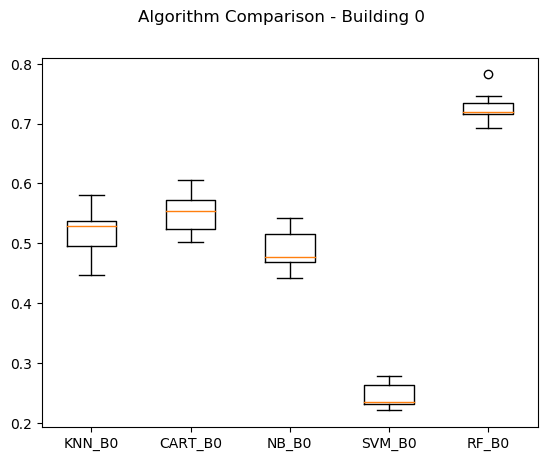

In [294]:
# Visualize distribution of accuracy values calculated across cross-validation folds using box and whisker plots - Building 0

base_fig = plt.figure()
base_fig.suptitle('Algorithm Comparison - Building 0')
base_ax = base_fig.add_subplot(111)
plt.boxplot(results_B0)
base_ax.set_xticklabels(names_B0)
plt.show()

In [295]:
# Spot-check algorithms - Building 1
models_B1 = []
models_B1.append(('KNN_B1', KNeighborsClassifier()))
models_B1.append(('CART_B1', DecisionTreeClassifier()))
models_B1.append(('NB_B1', GaussianNB()))
models_B1.append(('SVM_B1', SVC(gamma='auto')))
models_B1.append(('RF_B1', RandomForestClassifier(n_estimators=100)))

In [296]:
# Results show mean accuracy values for each algorithm - Building 1
results_B1 = []
names_B1 = []
for name, model in models_B1:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv_results_B1 = cross_val_score(model, X_B1_train, Y_B1_train, cv=kfold, scoring=scoring)
    results_B1.append(cv_results_B1)
    names_B1.append(name)
    msg_B1 = "%s: %f (%f)" % (name, cv_results_B1.mean(), cv_results_B1.std())
    print(msg_B1)

KNN_B1: 0.626712 (0.021268)
CART_B1: 0.669345 (0.018858)
NB_B1: 0.626693 (0.013863)
SVM_B1: 0.268908 (0.027330)
RF_B1: 0.844924 (0.011921)


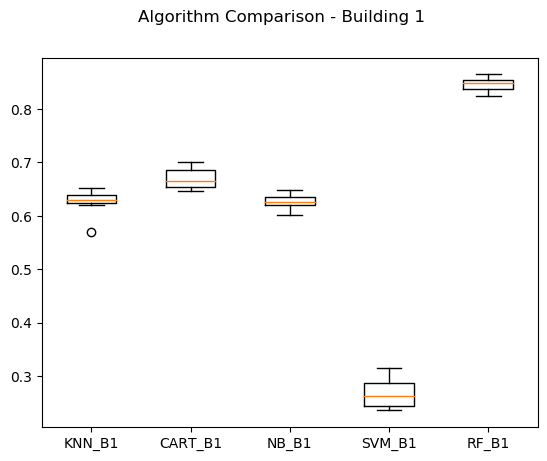

In [297]:
# Visualize distribution of accuracy values calculated across cross-validation folds using box and whisker plots - Building 1

base_fig = plt.figure()
base_fig.suptitle('Algorithm Comparison - Building 1')
base_ax = base_fig.add_subplot(111)
plt.boxplot(results_B1)
base_ax.set_xticklabels(names_B1)
plt.show()

In [298]:
# Spot-check algorithms - Building 2
models_B2 = []
models_B2.append(('KNN_B2', KNeighborsClassifier()))
models_B2.append(('CART_B2', DecisionTreeClassifier()))
models_B2.append(('NB_B2', GaussianNB()))
models_B2.append(('SVM_B2', SVC(gamma='auto')))
models_B2.append(('RF_B2', RandomForestClassifier(n_estimators=100)))

In [299]:
# Results show mean accuracy values for each algorithm - Building 2
results_B2 = []
names_B2 = []
for name, model in models_B2:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv_results_B2 = cross_val_score(model, X_B2_train, Y_B2_train, cv=kfold, scoring=scoring)
    results_B2.append(cv_results_B2)
    names_B2.append(name)
    msg_B2 = "%s: %f (%f)" % (name, cv_results_B2.mean(), cv_results_B2.std())
    print(msg_B2)

KNN_B2: 0.581226 (0.016199)
CART_B2: 0.547079 (0.011584)
NB_B2: 0.535288 (0.017895)
SVM_B2: 0.087500 (0.010490)
RF_B2: 0.794314 (0.013945)


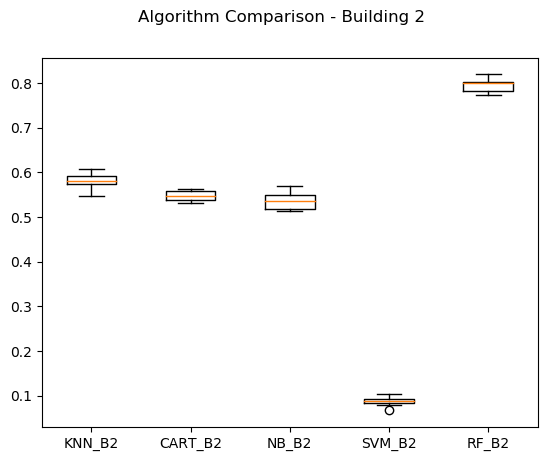

In [300]:
# Visualize distribution of accuracy values calculated across cross-validation folds using box and whisker plots - Building 2

base_fig = plt.figure()
base_fig.suptitle('Algorithm Comparison - Building 2')
base_ax = base_fig.add_subplot(111)
plt.boxplot(results_B2)
base_ax.set_xticklabels(names_B2)
plt.show()

##### Spot check NZV dataset with algorithms

In [303]:
# Ind/Dep variables for Building 0
X_NZV = rdyTrain_nzv_B0.iloc[:, 0:152]
Y_NZV = rdyTrain_nzv_B0.iloc[:, -1]

# Ind/Dep variables for Building 1
X_NZV_B1 = rdyTrain_nzv_B1.iloc[:, 0:192]
Y_NZV_B1 = rdyTrain_nzv_B1.iloc[:, -1]

# Ind/Dep variables for Building 2
X_NZV_B2 = rdyTrain_nzv_B2.iloc[:, 0:162]
Y_NZV_B2 = rdyTrain_nzv_B2.iloc[:, -1]


In [305]:
validation_size = 0.30
seed = 2116

# Split train/test dataset Building 0 
X_NZV_B0_train, X_NZV_B0_validation, Y_NZV_B0_train, Y_NZV_B0_validation = train_test_split(X_NZV, Y_NZV,
test_size=validation_size, random_state=seed)

# Split train/test dataset Building 1 
X_NZV_B1_train, X_NZV_B1_validation, Y_NZV_B1_train, Y_NZV_B1_validation = train_test_split(X_NZV_B1, Y_NZV_B1,
test_size=validation_size, random_state=seed)

# Split train/test dataset Building 2
X_NZV_B2_train, X_NZV_B2_validation, Y_NZV_B2_train, Y_NZV_B2_validation = train_test_split(X_NZV_B2, Y_NZV_B2,
test_size=validation_size, random_state=seed)

In [306]:
# Evaluate a baseline performance for selected algorithms
# Test options and evaluation metric
folds = 10
seed = 2116
scoring = 'accuracy'

#### Building 0

In [307]:
# Spot-check algorithms - NZV - Building 0
models_NZV_B0 = []
models_NZV_B0.append(('KNN_NZV_B0', KNeighborsClassifier()))
models_NZV_B0.append(('CART_NZV_B0', DecisionTreeClassifier()))
models_NZV_B0.append(('NB_NZV_B0', GaussianNB()))
models_NZV_B0.append(('SVM_NZV_B0', SVC(gamma='auto')))
models_NZV_B0.append(('RF_NZV_B0', RandomForestClassifier(n_estimators=100)))

In [309]:
# Results show mean accuracy values for each algorithm - Building 0
results_NZV_B0 = []
names_NZV_B0 = []
for name, model in models_NZV_B0:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv_results_NZV_B0 = cross_val_score(model, X_NZV_B0_train, Y_NZV_B0_train, cv=kfold, scoring=scoring)
    results_NZV_B0.append(cv_results_NZV_B0)
    names_NZV_B0.append(name)
    msg_NZV_B0 = "%s: %f (%f)" % (name, cv_results_NZV_B0.mean(), cv_results_NZV_B0.std())
    print(msg_NZV_B0)

KNN_NZV_B0: 0.517826 (0.035389)
CART_NZV_B0: 0.543980 (0.025553)
NB_NZV_B0: 0.488986 (0.033123)
SVM_NZV_B0: 0.187572 (0.018422)
RF_NZV_B0: 0.734010 (0.025112)


In [310]:
mpl.rc_file_defaults()

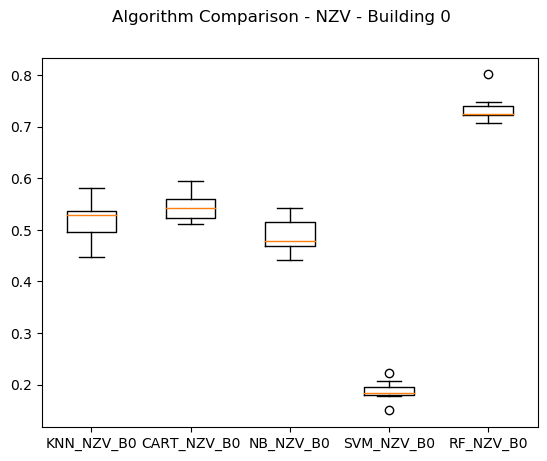

In [311]:
# Visualize distribution of accuracy values calculated across cross-validation folds using box and whisker plots - Building 0

base_fig = plt.figure()
base_fig.suptitle('Algorithm Comparison - NZV - Building 0')
base_ax = base_fig.add_subplot(111)
plt.boxplot(results_NZV_B0)
base_ax.set_xticklabels(names_NZV_B0)
plt.show()

#### Building 1

In [312]:
# Spot-check algorithms - NZV - Building 1
models_NZV_B1 = []
models_NZV_B1.append(('KNN_NZV_B1', KNeighborsClassifier()))
models_NZV_B1.append(('CART_NZV_B1', DecisionTreeClassifier()))
models_NZV_B1.append(('NB_NZV_B1', GaussianNB()))
models_NZV_B1.append(('SVM_NZV_B1', SVC(gamma='auto')))
models_NZV_B1.append(('RF_NZV_B1', RandomForestClassifier(n_estimators=100)))

In [321]:
# Results show mean accuracy values for each algorithm - Building 1
results_NZV_B1 = []
names_NZV_B1 = []
for name, model in models_NZV_B1:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv_results_NZV_B1 = cross_val_score(model, X_NZV_B1_train, Y_NZV_B1_train, cv=kfold, scoring=scoring)
    results_NZV_B1.append(cv_results_NZV_B1)
    names_NZV_B1.append(name)
    msg_NZV_B1 = "%s: %f (%f)" % (name, cv_results_NZV_B1.mean(), cv_results_NZV_B1.std())
    print(msg_NZV_B1)

KNN_NZV_B1: 0.626712 (0.021268)
CART_NZV_B1: 0.668516 (0.015154)
NB_NZV_B1: 0.626693 (0.013863)
SVM_NZV_B1: 0.237059 (0.027109)
RF_NZV_B1: 0.850462 (0.015759)


In [310]:
mpl.rc_file_defaults()

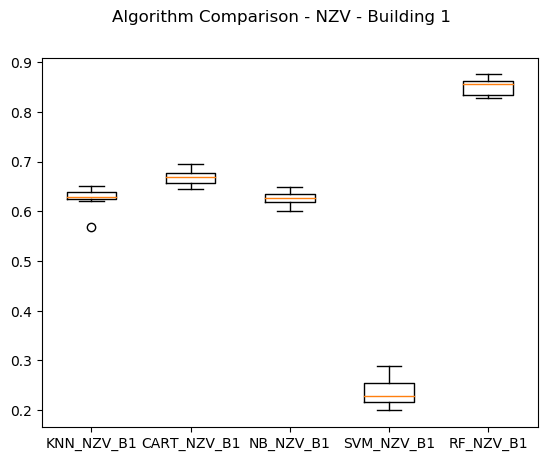

In [322]:
# Visualize distribution of accuracy values calculated across cross-validation folds using box and whisker plots - Building 1

base_fig = plt.figure()
base_fig.suptitle('Algorithm Comparison - NZV - Building 1')
base_ax = base_fig.add_subplot(111)
plt.boxplot(results_NZV_B1)
base_ax.set_xticklabels(names_NZV_B1)
plt.show()

#### Building 2

In [315]:
# Spot-check algorithms - NZV - Building 2
models_NZV_B2 = []
models_NZV_B2.append(('KNN_NZV_B2', KNeighborsClassifier()))
models_NZV_B2.append(('CART_NZV_B2', DecisionTreeClassifier()))
models_NZV_B2.append(('NB_NZV_B2', GaussianNB()))
models_NZV_B2.append(('SVM_NZV_B2', SVC(gamma='auto')))
models_NZV_B2.append(('RF_NZV_B2', RandomForestClassifier(n_estimators=100)))

In [319]:
# Results show mean accuracy values for each algorithm - Building 2
results_NZV_B2 = []
names_NZV_B2 = []
for name, model in models_NZV_B2:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv_results_NZV_B2 = cross_val_score(model, X_NZV_B2_train, Y_NZV_B2_train, cv=kfold, scoring=scoring)
    results_NZV_B2.append(cv_results_NZV_B2)
    names_NZV_B2.append(name)
    msg_NZV_B2 = "%s: %f (%f)" % (name, cv_results_NZV_B2.mean(), cv_results_NZV_B2.std())
    print(msg_NZV_B2)

KNN_NZV_B2: 0.581226 (0.016199)
CART_NZV_B2: 0.543299 (0.013603)
NB_NZV_B2: 0.535288 (0.017895)
SVM_NZV_B2: 0.063772 (0.008445)
RF_NZV_B2: 0.793711 (0.015684)


In [317]:
mpl.rc_file_defaults()

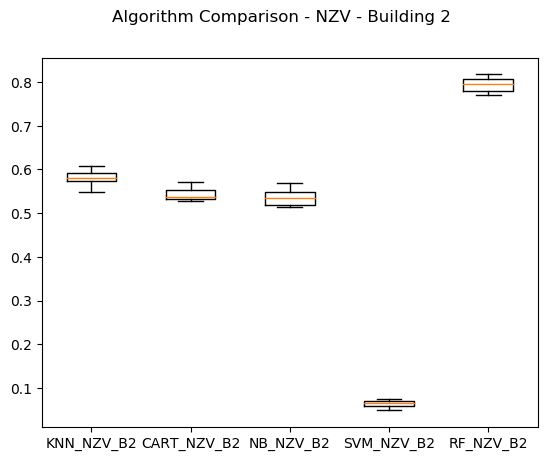

In [320]:
# Visualize distribution of accuracy values calculated across cross-validation folds using box and whisker plots - Building 2

base_fig = plt.figure()
base_fig.suptitle('Algorithm Comparison - NZV - Building 2')
base_ax = base_fig.add_subplot(111)
plt.boxplot(results_NZV_B2)
base_ax.set_xticklabels(names_NZV_B2)
plt.show()

##### Spot check RFE dataset with algorithms

In [323]:
# Ind/Dep variables for Building 0
X_RFE = rdyTrain_rfe_B0.iloc[:, 0:182]
Y_RFE = rdyTrain_rfe_B0.iloc[:, -1]

# Ind/Dep variables for Building 1
X_RFE_B1 = rdyTrain_rfe_B1.iloc[:, 0:182]
Y_RFE_B1 = rdyTrain_rfe_B1.iloc[:, -1]

# Ind/Dep variables for Building 2
X_RFE_B2 = rdyTrain_rfe_B2.iloc[:, 0:182]
Y_RFE_B2 = rdyTrain_rfe_B2.iloc[:, -1]


In [324]:
validation_size = 0.30
seed = 2116

# Split train/test dataset Building 0 
X_RFE_B0_train, X_RFE_B0_validation, Y_RFE_B0_train, Y_RFE_B0_validation = train_test_split(X_RFE, Y_RFE,
test_size=validation_size, random_state=seed)

# Split train/test dataset Building 1 
X_RFE_B1_train, X_RFE_B1_validation, Y_RFE_B1_train, Y_RFE_B1_validation = train_test_split(X_RFE_B1, Y_RFE_B1,
test_size=validation_size, random_state=seed)

# Split train/test dataset Building 2
X_RFE_B2_train, X_RFE_B2_validation, Y_RFE_B2_train, Y_RFE_B2_validation = train_test_split(X_RFE_B2, Y_RFE_B2,
test_size=validation_size, random_state=seed)

In [325]:
# Evaluate a baseline performance for selected algorithms
# Test options and evaluation metric
folds = 10
seed = 2116
scoring = 'accuracy'

#### Building 0

In [326]:
# Spot-check algorithms - RFE - Building 0
models_RFE_B0 = []
models_RFE_B0.append(('KNN_RFE_B0', KNeighborsClassifier()))
models_RFE_B0.append(('CART_RFE_B0', DecisionTreeClassifier()))
models_RFE_B0.append(('NB_RFE_B0', GaussianNB()))
models_RFE_B0.append(('SVM_RFE_B0', SVC(gamma='auto')))
models_RFE_B0.append(('RF_RFE_B0', RandomForestClassifier(n_estimators=100)))

In [327]:
# Results show mean accuracy values for each algorithm - Building 0
results_RFE_B0 = []
names_RFE_B0 = []
for name, model in models_RFE_B0:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv_results_RFE_B0 = cross_val_score(model, X_RFE_B0_train, Y_RFE_B0_train, cv=kfold, scoring=scoring)
    results_RFE_B0.append(cv_results_RFE_B0)
    names_RFE_B0.append(name)
    msg_RFE_B0 = "%s: %f (%f)" % (name, cv_results_RFE_B0.mean(), cv_results_RFE_B0.std())
    print(msg_RFE_B0)

KNN_RFE_B0: 0.516466 (0.034962)
CART_RFE_B0: 0.545880 (0.017961)
NB_RFE_B0: 0.484903 (0.031062)
SVM_RFE_B0: 0.212619 (0.021623)
RF_RFE_B0: 0.727464 (0.025833)


In [310]:
mpl.rc_file_defaults()

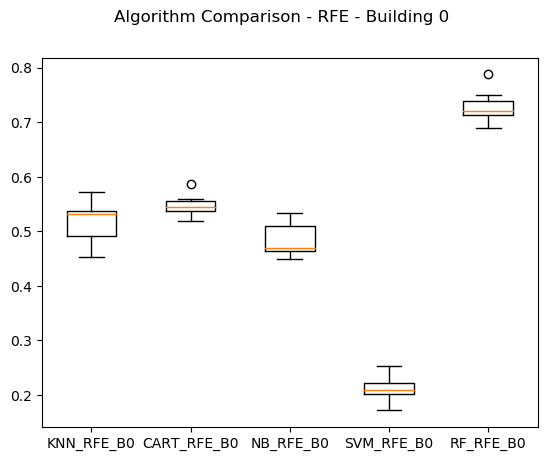

In [328]:
# Visualize distribution of accuracy values calculated across cross-validation folds using box and whisker plots - Building 0

base_fig = plt.figure()
base_fig.suptitle('Algorithm Comparison - RFE - Building 0')
base_ax = base_fig.add_subplot(111)
plt.boxplot(results_RFE_B0)
base_ax.set_xticklabels(names_RFE_B0)
plt.show()

#### Building 1

In [329]:
# Spot-check algorithms - RFE - Building 1
models_RFE_B1 = []
models_RFE_B1.append(('KNN_RFE_B1', KNeighborsClassifier()))
models_RFE_B1.append(('CART_RFE_B1', DecisionTreeClassifier()))
models_RFE_B1.append(('NB_RFE_B1', GaussianNB()))
models_RFE_B1.append(('SVM_RFE_B1', SVC(gamma='auto')))
models_RFE_B1.append(('RF_RFE_B1', RandomForestClassifier(n_estimators=100)))

In [330]:
# Results show mean accuracy values for each algorithm - Building 1
results_RFE_B1 = []
names_RFE_B1 = []
for name, model in models_RFE_B1:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv_results_RFE_B1 = cross_val_score(model, X_RFE_B1_train, Y_RFE_B1_train, cv=kfold, scoring=scoring)
    results_RFE_B1.append(cv_results_RFE_B1)
    names_RFE_B1.append(name)
    msg_RFE_B1 = "%s: %f (%f)" % (name, cv_results_RFE_B1.mean(), cv_results_RFE_B1.std())
    print(msg_RFE_B1)

KNN_RFE_B1: 0.622835 (0.022703)
CART_RFE_B1: 0.674607 (0.015790)
NB_RFE_B1: 0.626418 (0.012088)
SVM_RFE_B1: 0.242321 (0.025895)
RF_RFE_B1: 0.845208 (0.019899)


In [310]:
mpl.rc_file_defaults()

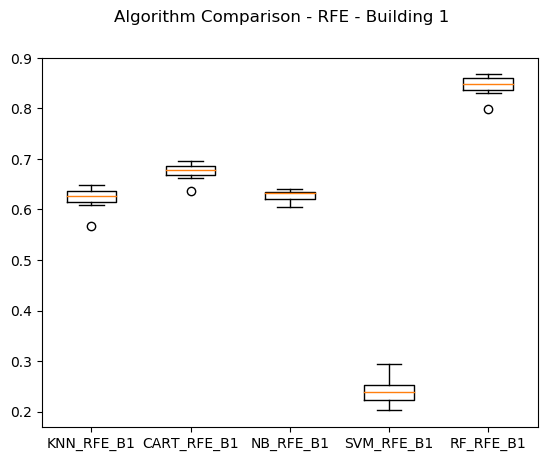

In [331]:
# Visualize distribution of accuracy values calculated across cross-validation folds using box and whisker plots - Building 1

base_fig = plt.figure()
base_fig.suptitle('Algorithm Comparison - RFE - Building 1')
base_ax = base_fig.add_subplot(111)
plt.boxplot(results_RFE_B1)
base_ax.set_xticklabels(names_RFE_B1)
plt.show()

#### Building 2

In [332]:
# Spot-check algorithms - RFE - Building 2
models_RFE_B2 = []
models_RFE_B2.append(('KNN_RFE_B2', KNeighborsClassifier()))
models_RFE_B2.append(('CART_RFE_B2', DecisionTreeClassifier()))
models_RFE_B2.append(('NB_RFE_B2', GaussianNB()))
models_RFE_B2.append(('SVM_RFE_B2', SVC(gamma='auto')))
models_RFE_B2.append(('RF_RFE_B2', RandomForestClassifier(n_estimators=100)))

In [333]:
# Results show mean accuracy values for each algorithm - Building 2
results_RFE_B2 = []
names_RFE_B2 = []
for name, model in models_RFE_B2:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv_results_RFE_B2 = cross_val_score(model, X_RFE_B2_train, Y_RFE_B2_train, cv=kfold, scoring=scoring)
    results_RFE_B2.append(cv_results_RFE_B2)
    names_RFE_B2.append(name)
    msg_RFE_B2 = "%s: %f (%f)" % (name, cv_results_RFE_B2.mean(), cv_results_RFE_B2.std())
    print(msg_RFE_B2)

KNN_RFE_B2: 0.580923 (0.015877)
CART_RFE_B2: 0.549798 (0.012176)
NB_RFE_B2: 0.528636 (0.018903)
SVM_RFE_B2: 0.069818 (0.009294)
RF_RFE_B2: 0.794462 (0.017187)


In [317]:
mpl.rc_file_defaults()

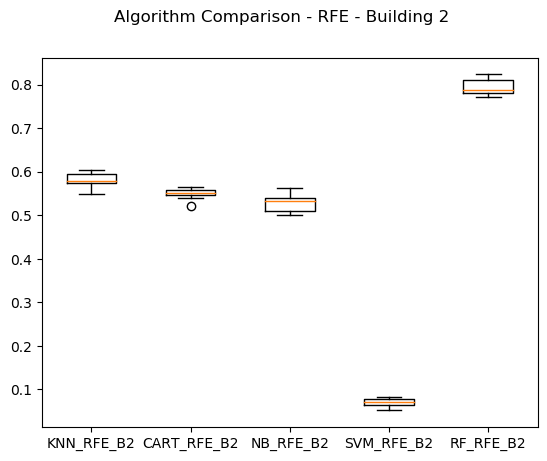

In [334]:
# Visualize distribution of accuracy values calculated across cross-validation folds using box and whisker plots - Building 2

base_fig = plt.figure()
base_fig.suptitle('Algorithm Comparison - RFE - Building 2')
base_ax = base_fig.add_subplot(111)
plt.boxplot(results_RFE_B2)
base_ax.set_xticklabels(names_RFE_B2)
plt.show()

After running an algorithm spot-check with each dataset, the best performing model for this application is Random Forest.
The scores for the random forest algorithm are as follows:

Building 0
* Preprocessed Dataset - 0.7267
* NZV - 0.7340
* RFE - 0.7275

Building 1
* Preprocessed Dataset - 0.8449
* NZV - 0.8505
* RFE - 0.8452

Building 2
* Preprocessed Dataset - 0.7943
* NZV - 0.7937
* RFE - 0.7945

We will try and improve the building model by model tuning the random forest algorithm.
Building 0 will use the NZV dataset.
Building 1 will use the NZV dataset.
Building 2 will use the RFE dataset.

### Model Tuning

In [342]:
# Random Forest Classification Model Tuning - NZV - Building 0
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]),max_features=np.array([3,5,7,9,10]))
model = RandomForestClassifier()
kfold = KFold(n_splits=10, random_state=7)
rf_cvB0 = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
rfresultB0 = rf_cvB0.fit(X_NZV_B0_train, Y_NZV_B0_train)
print("Best: %f using %s" % (rfresultB0.best_score_, rfresultB0.best_params_))
meansB0 = rfresultB0.cv_results_['mean_test_score']
stdsB0 = rfresultB0.cv_results_['std_test_score']
paramsB0 = rfresultB0.cv_results_['params']
for mean, stdev, param in zip(meansB0, stdsB0, paramsB0):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.741084 using {'max_features': 10, 'n_estimators': 250}
0.701334 (0.024686) with: {'max_features': 3, 'n_estimators': 50}
0.716853 (0.016843) with: {'max_features': 3, 'n_estimators': 100}
0.717397 (0.015505) with: {'max_features': 3, 'n_estimators': 150}
0.723387 (0.015462) with: {'max_features': 3, 'n_estimators': 200}
0.726654 (0.014742) with: {'max_features': 3, 'n_estimators': 250}
0.724204 (0.015339) with: {'max_features': 3, 'n_estimators': 300}
0.729377 (0.017089) with: {'max_features': 3, 'n_estimators': 350}
0.735094 (0.015879) with: {'max_features': 3, 'n_estimators': 400}
0.712224 (0.018634) with: {'max_features': 5, 'n_estimators': 50}
0.717125 (0.015249) with: {'max_features': 5, 'n_estimators': 100}
0.722842 (0.012693) with: {'max_features': 5, 'n_estimators': 150}
0.721209 (0.016371) with: {'max_features': 5, 'n_estimators': 200}
0.725020 (0.013108) with: {'max_features': 5, 'n_estimators': 250}
0.726382 (0.018531) with: {'max_features': 5, 'n_estimators': 300}
0

In [343]:
# Random Forest Classification Model Tuning - NZV - Building 1
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]),max_features=np.array([3,5,7,9,10]))
model = RandomForestClassifier()
kfold = KFold(n_splits=10, random_state=7)
rf_cvB1 = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
rfresultB1 = rf_cvB1.fit(X_NZV_B1_train, Y_NZV_B1_train)
print("Best: %f using %s" % (rfresultB1.best_score_, rfresultB1.best_params_))
meansB1 = rfresultB1.cv_results_['mean_test_score']
stdsB1 = rfresultB1.cv_results_['std_test_score']
paramsB1 = rfresultB1.cv_results_['params']
for mean, stdev, param in zip(meansB1, stdsB1, paramsB1):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.854057 using {'max_features': 9, 'n_estimators': 350}
0.833564 (0.021483) with: {'max_features': 3, 'n_estimators': 50}
0.842980 (0.024542) with: {'max_features': 3, 'n_estimators': 100}
0.845749 (0.026768) with: {'max_features': 3, 'n_estimators': 150}
0.844641 (0.023396) with: {'max_features': 3, 'n_estimators': 200}
0.848518 (0.025134) with: {'max_features': 3, 'n_estimators': 250}
0.847688 (0.022700) with: {'max_features': 3, 'n_estimators': 300}
0.844364 (0.022501) with: {'max_features': 3, 'n_estimators': 350}
0.847688 (0.022419) with: {'max_features': 3, 'n_estimators': 400}
0.828302 (0.023206) with: {'max_features': 5, 'n_estimators': 50}
0.842980 (0.016771) with: {'max_features': 5, 'n_estimators': 100}
0.846026 (0.018862) with: {'max_features': 5, 'n_estimators': 150}
0.853780 (0.024260) with: {'max_features': 5, 'n_estimators': 200}
0.848518 (0.022945) with: {'max_features': 5, 'n_estimators': 250}
0.847411 (0.020506) with: {'max_features': 5, 'n_estimators': 300}
0.

In [344]:
# Random Forest Classification Model Tuning - RFE - Building 2
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]),max_features=np.array([3,5,7,9,10]))
model = RandomForestClassifier()
kfold = KFold(n_splits=10, random_state=7)
rf_cvB2 = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
rfresultB2 = rf_cvB2.fit(X_RFE_B2_train, Y_RFE_B2_train)
print("Best: %f using %s" % (rfresultB2.best_score_, rfresultB2.best_params_))
meansB2 = rfresultB2.cv_results_['mean_test_score']
stdsB2 = rfresultB2.cv_results_['std_test_score']
paramsB2 = rfresultB2.cv_results_['params']
for mean, stdev, param in zip(meansB2, stdsB2, paramsB2):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.804292 using {'max_features': 9, 'n_estimators': 400}
0.763488 (0.016455) with: {'max_features': 3, 'n_estimators': 50}
0.779507 (0.012843) with: {'max_features': 3, 'n_estimators': 100}
0.782832 (0.015076) with: {'max_features': 3, 'n_estimators': 150}
0.794167 (0.018759) with: {'max_features': 3, 'n_estimators': 200}
0.794318 (0.018156) with: {'max_features': 3, 'n_estimators': 250}
0.790691 (0.015163) with: {'max_features': 3, 'n_estimators': 300}
0.792806 (0.017665) with: {'max_features': 3, 'n_estimators': 350}
0.794620 (0.019551) with: {'max_features': 3, 'n_estimators': 400}
0.768324 (0.017089) with: {'max_features': 5, 'n_estimators': 50}
0.778903 (0.017483) with: {'max_features': 5, 'n_estimators': 100}
0.792504 (0.017102) with: {'max_features': 5, 'n_estimators': 150}
0.791749 (0.019254) with: {'max_features': 5, 'n_estimators': 200}
0.797340 (0.018833) with: {'max_features': 5, 'n_estimators': 250}
0.797945 (0.015382) with: {'max_features': 5, 'n_estimators': 300}
0.

Best performing models:

* Building 0: 0.741084 using {'max_features': 10, 'n_estimators': 250}
* Building 1: 0.854057 using {'max_features': 9, 'n_estimators': 350}
* Building 2: 0.804292 using {'max_features': 9, 'n_estimators': 400}

### Model Evaluation

In [345]:
# Predict the labels of the test set: y_pred using Random Forest (NZV)
y_predNZV_B0 = rf_cvB0.predict(X_NZV_B0_validation)
# Compute and print metrics
print("Accuracy: {}".format(rf_cvB0.score(X_NZV_B0_validation, Y_NZV_B0_validation)))
print(classification_report(Y_NZV_B0_validation, y_predNZV_B0))
print("Tuned Model Parameters: {}".format(rf_cvB0.best_params_))

Accuracy: 0.7504761904761905
              precision    recall  f1-score   support

        1022       0.78      0.70      0.74        10
        1062       1.00      0.33      0.50         3
        1072       0.25      1.00      0.40         1
        1102       1.00      0.50      0.67         2
        1112       0.80      0.67      0.73         6
        1122       0.80      0.89      0.84         9
        1132       0.83      1.00      0.91         5
        1142       0.67      0.50      0.57         4
        1152       0.50      0.50      0.50         4
        1162       1.00      0.57      0.73         7
        1172       0.75      0.60      0.67         5
        1182       0.55      1.00      0.71         6
        1192       1.00      0.67      0.80         9
        1202       0.55      1.00      0.71         6
        1212       0.88      1.00      0.93         7
        1222       0.60      0.75      0.67         4
        1232       1.00      0.50      0.67         

In [346]:
# Predict the labels of the test set: y_pred using Random Forest (NZV)
y_predNZV_B1 = rf_cvB1.predict(X_NZV_B1_validation)
# Compute and print metrics
print("Accuracy: {}".format(rf_cvB1.score(X_NZV_B1_validation, Y_NZV_B1_validation)))
print(classification_report(Y_NZV_B1_validation, y_predNZV_B1))
print("Tuned Model Parameters: {}".format(rf_cvB1.best_params_))

Accuracy: 0.8546511627906976
              precision    recall  f1-score   support

        1011       1.00      1.00      1.00         2
        1012       1.00      1.00      1.00         5
        1032       1.00      1.00      1.00         4
        1062       1.00      1.00      1.00         6
        1091       1.00      1.00      1.00         2
        1092       0.83      1.00      0.91         5
        1122       1.00      1.00      1.00         4
        1132       1.00      0.43      0.60         7
        1142       0.67      1.00      0.80         6
        1152       1.00      1.00      1.00         1
        1162       1.00      0.50      0.67         2
        1172       0.67      1.00      0.80         2
        1182       1.00      0.17      0.29         6
        1221       1.00      1.00      1.00         5
        1222       1.00      1.00      1.00         8
        1231       1.00      1.00      1.00         2
        1232       1.00      1.00      1.00         

C:\Users\rms65\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rms65\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [347]:
# Predict the labels of the test set: y_pred using Random Forest (RFE)
y_predRFE_B2 = rf_cvB2.predict(X_RFE_B2_validation)
# Compute and print metrics
print("Accuracy: {}".format(rf_cvB2.score(X_RFE_B2_validation, Y_RFE_B2_validation)))
print(classification_report(Y_RFE_B2_validation, y_predRFE_B2))
print("Tuned Model Parameters: {}".format(rf_cvB2.best_params_))

Accuracy: 0.8138879097638351
              precision    recall  f1-score   support

      201012       1.00      1.00      1.00        10
      201031       1.00      1.00      1.00         5
      201032       0.86      0.86      0.86         7
      201041       0.86      1.00      0.92         6
      201042       0.94      0.94      0.94        17
      201062       1.00      0.60      0.75        10
      201071       1.00      1.00      1.00         7
      201072       1.00      1.00      1.00         4
      201082       0.60      0.86      0.71         7
      201102       1.00      0.92      0.96        13
      201112       1.00      1.00      1.00        11
      201121       0.86      1.00      0.92         6
      201122       0.50      1.00      0.67         2
      201132       1.00      0.67      0.80         6
      201172       0.90      0.60      0.72        15
      201182       0.75      0.94      0.83        16
      201192       0.91      0.71      0.80        1

C:\Users\rms65\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Finalize Models

In [348]:
# save Building 0 model to disk
filenameB0 = 'finalized_modelB0.sav'
dump(rf_cvB0, open(filenameB0, 'wb'))

# some time later...
# load the model from disk
loaded_modelB0 = load(open(filenameB0, 'rb'))
resultB0 = loaded_modelB0.score(X_NZV_B0_validation, Y_NZV_B0_validation)
print(resultB0)

0.7504761904761905


In [349]:
# save Building 1 model to disk
filenameB1 = 'finalized_modelB1.sav'
dump(rf_cvB1, open(filenameB1, 'wb'))

# some time later...
# load the model from disk
loaded_modelB1 = load(open(filenameB1, 'rb'))
resultB1 = loaded_modelB1.score(X_NZV_B1_validation, Y_NZV_B1_validation)
print(resultB1)

0.8546511627906976


In [350]:
# save Building 2 model to disk
filenameB2 = 'finalized_modelB2.sav'
dump(rf_cvB2, open(filenameB2, 'wb'))

# some time later...
# load the model from disk
loaded_modelB2 = load(open(filenameB2, 'rb'))
resultB2 = loaded_modelB2.score(X_RFE_B2_validation, Y_RFE_B2_validation)
print(resultB2)

0.8138879097638351
